In [ ]:
!pip install -q transformers==4.49 diffusers==0.32.2 accelerate safetensors

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 131.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 74.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 99.1 MB/s eta 0:00:00


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

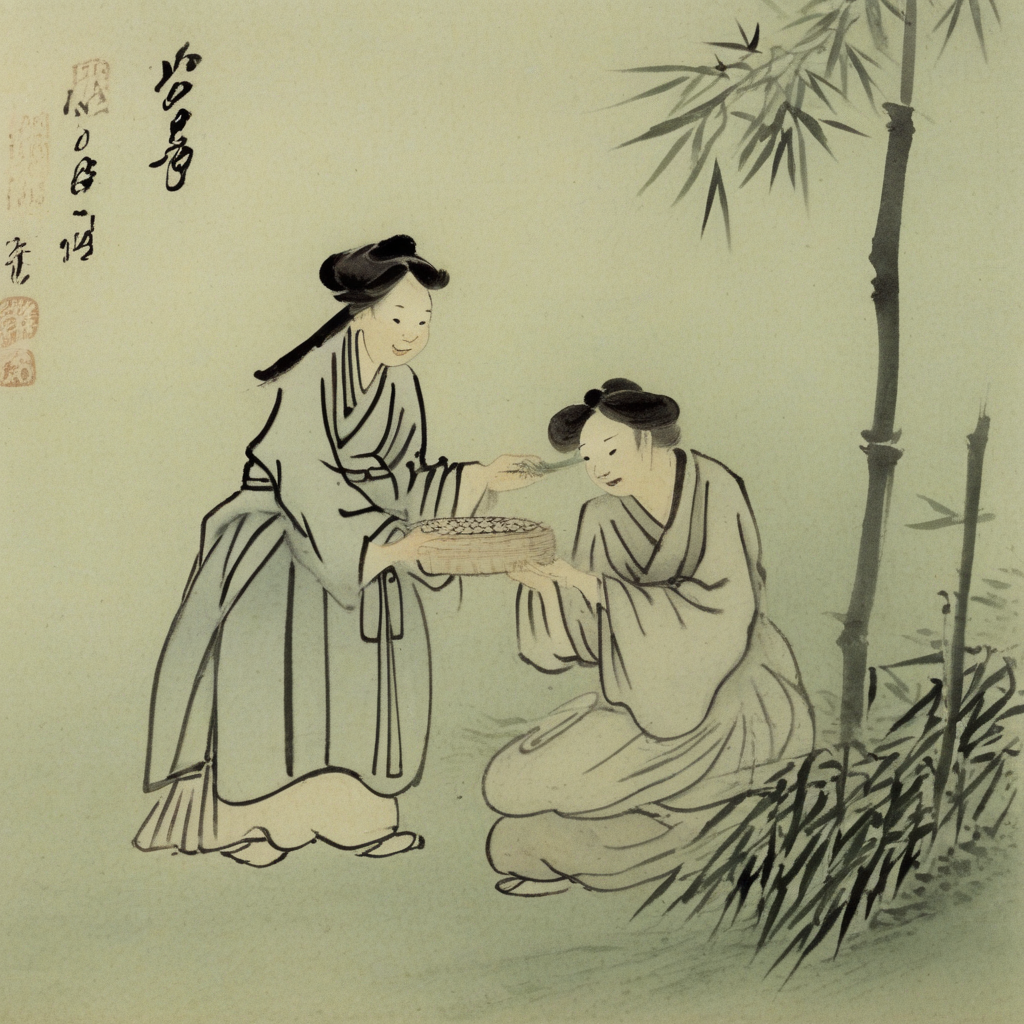

In [ ]:
#@title ✨ Generate Korean Images with my LoRA (SDXL)

#@markdown ### 2. Model and LoRA Configuration
#@markdown Mount Google Drive and input the model and LoRA information you wish to use.
from google.colab import drive
drive.mount('/content/drive')

import torch
from diffusers import DiffusionPipeline
from google.colab import drive
from IPython.display import display
import os

#@markdown **My LoRA File Path:** Enter the full path of the .safetensors file located in your Google Drive.
lora_path_in_drive = "/content/drive/MyDrive/Loras/Korean_maingirl2/output/Korean_maingirl2-10.safetensors" #@param {type:"string"}

#@markdown **LoRA Weight:** Adjust how strongly the LoRA effect is applied. (Typically 0.7 ~ 1.0)
lora_weight = 1 #@param {type:"slider", min:0, max:2, step:0.1}

# Load SDXL Base Model
base_model_id = "stabilityai/stable-diffusion-xl-base-1.0"
pipe = DiffusionPipeline.from_pretrained(
    base_model_id,
    torch_dtype=torch.float16,
    variant="fp16",
    use_safetensors=True
)
pipe = pipe.to("cuda")

# Load My LoRA Weights
pipe.load_lora_weights(lora_path_in_drive)

#@markdown ---
#@markdown ### 3. Prompt Input
#@markdown Describe the image you want to generate and adjust various options.
#@markdown **Prompt:** Describe what you want to draw in detail. It is recommended to include trigger words that evoke the style you trained.
prompt = "sub-oldwoman in a worn hanbok gently offers a small rice cake to the main-girl wearing an old hanbokCenter. A bamboo grove rustles softly in the breeze. Back right. Kimhongdo style, ink wash painting, muted earthy tones, subtle color highlights, thin line." #@param {type:"string"}
#@markdown **Negative Prompt:** List things you do NOT want to see in the image.
negative_prompt = "text, bright colors, saturated tones,  golden embroidery, digital art, anime, cartoon, 3D render, fantasy, glossy finish, distorted face, blurry face, extra limbs" #@param {type:"string"}

#@markdown **Image Generation Options**
num_inference_steps = 30 #@param {type:"slider", min:10, max:100, step:1}
guidance_scale = 7.5 #@param {type:"slider", min:1, max:20, step:0.5}

#@markdown ---
#@markdown ### 4. Execute Image Generation
#@markdown Once all settings are complete, run this cell to generate the image. (Takes 10 seconds to over a minute depending on GPU performance)
image = pipe(
    prompt=prompt,
    negative_prompt=negative_prompt,
    num_inference_steps=num_inference_steps,
    guidance_scale=guidance_scale,
    lora_scale=lora_weight  # Final application of LoRA strength here.
).images[0]

#@markdown Check the generated image below!
display(image)
image.save("/content/drive/MyDrive/generated/Kimhongdostyle_image_generation.png")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

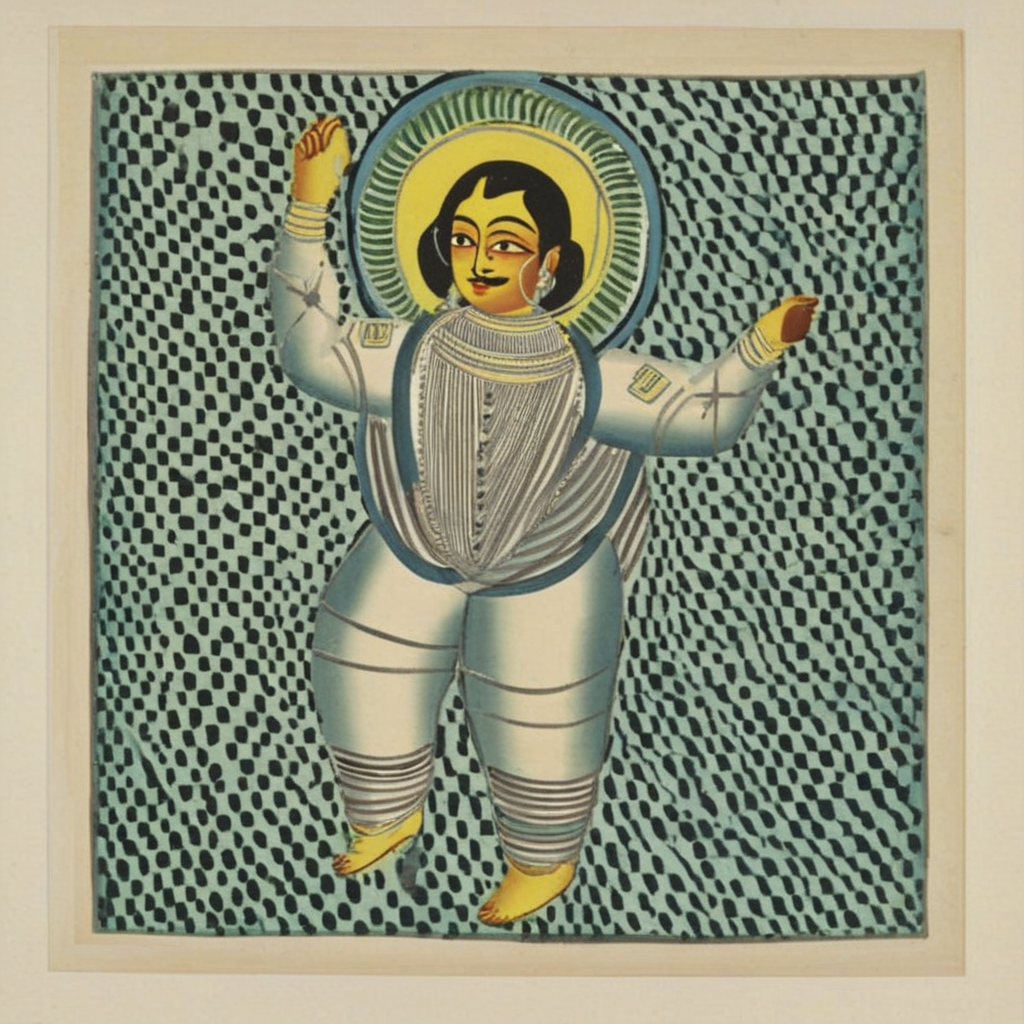

In [ ]:
#@title ✨ Generate Bangali Images with My LoRA (SDXL)

#@markdown ### 1. Preparation
#@markdown Install the necessary libraries. (Takes about 1-2 minutes for the first run)
!pip install -q diffusers transformers accelerate safetensors

#@markdown ---
#@markdown ### 2. Model and LoRA Configuration
#@markdown Mount Google Drive and enter the model and LoRA information you wish to use.
from google.colab import drive
drive.mount('/content/drive')

import torch
from diffusers import DiffusionPipeline

#@markdown **My LoRA File Path:** Enter the full path of the .safetensors file in your Google Drive.
lora_path_in_drive = "/content/drive/MyDrive/Loras/Kalighat500_cropped_mainwoman/output/Kalighat500_cropped_mainwoman-10.safetensors" #@param {type:"string"}

#@markdown **LoRA Weight:** Adjust the strength of the LoRA effect. (Usually 0.7 ~ 1.0)
lora_weight = 1 #@param {type:"slider", min:0, max:2, step:0.1}

# Load SDXL base model
base_model_id = "stabilityai/stable-diffusion-xl-base-1.0"
pipe = DiffusionPipeline.from_pretrained(
    base_model_id,
    torch_dtype=torch.float16,
    variant="fp16",
    use_safetensors=True
)
pipe = pipe.to("cuda")

# Load my LoRA file
pipe.load_lora_weights(lora_path_in_drive)

#@markdown ---
#@markdown ### 3. Prompt Input
#@markdown Describe the image you want to generate and adjust various options.
#@markdown **Prompt:** Describe what you want to draw in detail. It is helpful to include trigger words that evoke the trained style.
prompt = "An astronaut in a full spacesuit floating gracefully against a backdrop of traditional Indian patterns and motifs, Kalighat Painting, Indian Folk Art, Bold Outlines." #@param {type:"string"}
#@markdown **Negative Prompt:** List things you do NOT want to appear in the drawing.
negative_prompt = "photorealistic, realistic, 3d, blurry, deformed, disfigured, poor anatomy, bad hands, extra limbs, watermark, text, signature, modern, digital painting" #@param {type:"string"}

#@markdown **Image Generation Options**
num_inference_steps = 30 #@param {type:"slider", min:10, max:100, step:1}
guidance_scale = 7.5 #@param {type:"slider", min:1, max:20, step:0.5}

#@markdown ---
#@markdown ### 4. Run Image Generation
#@markdown Once all settings are ready, run this cell to generate the image. (Takes 30 seconds to over a minute depending on GPU performance)
image = pipe(
    prompt=prompt,
    negative_prompt=negative_prompt,
    num_inference_steps=num_inference_steps,
    guidance_scale=guidance_scale,
    lora_scale=lora_weight  # Final LoRA strength application
).images[0]

#@markdown Check the generated image below!
display(image)
image.save("/content/drive/MyDrive/generated/kalighatstyle_image_generation.png")